In [42]:
# Enabling auto reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from pprint import pp

import pandas as pd

# You need to import custom class for loading pickle file to work.
from classes_v1 import DataHandler, MyEval, MyUtil, RegSwitcher

In [44]:
# Residual plots
IS_PLOT_RES = False
SAVE_PLOT_RES = False

# Combined plots
SAVE_PLOT = True

# Data
SAVE_DATA = True

### Load data


In [45]:
# Search for pkl files
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir(".") if (isfile(join(".", f)) and f.endswith("pkl"))]
pp(onlyfiles)

['S04_data_2025-05-19_10-58.pkl']


In [46]:
filenameInput = "S04_data_2025-05-19_10-58.pkl"
data_load = MyUtil.load_data(filename=filenameInput)

# Print keys
pp([k for k in data_load.keys()])


['desc', 'data_handler', 'param_split', 'param_grid_hyper', 'df_cv']


In [47]:
dt = MyUtil.get_dt()

In [48]:
data_handler = data_load["data_handler"]
df_cv = data_load["df_cv"]

In [49]:
df_cv

,id_split,param_split,id_gs,params,estimator,mean_test_score,std_test_score,rank_test_score,validation_scores
0,0,"{'random_state': 1, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,LinearRegression,-2.372222,3.924419,7,"[0.0381745359446262, 0.7520240440765592, -7.90..."
1,0,"{'random_state': 1, 'test_size': 0.3}",1,{'base': MultiOutputRegressor(estimator=SVR())...,SVR,-0.006503,0.027330,6,"[-0.0022755109373579683, -0.04188876497945082,..."
2,0,"{'random_state': 1, 'test_size': 0.3}",2,{'base': MultiOutputRegressor(estimator=SVR())...,SVR,0.304896,0.003312,5,"[0.302294515805052, 0.3095696294549572, 0.3028..."
3,0,"{'random_state': 1, 'test_size': 0.3}",3,{'base': MultiOutputRegressor(estimator=SVR())...,SVR,0.744229,0.089645,3,"[0.6177065038720949, 0.8144446900525925, 0.800..."
4,0,"{'random_state': 1, 'test_size': 0.3}",4,{'base': MultiOutputRegressor(estimator=Random...,RandomForestRegressor,0.734480,0.061007,4,"[0.6988549153386385, 0.8203441015929801, 0.684..."
5,0,"{'random_state': 1, 'test_size': 0.3}",5,{'base': MultiOutputRegressor(estimator=Random...,RandomForestRegressor,0.761403,0.071401,2,"[0.7314140937166814, 0.8598989065069723, 0.692..."
6,0,"{'random_state': 1, 'test_size': 0.3}",6,{'base': MultiOutputRegressor(estimator=Random...,RandomForestRegressor,0.772446,0.062778,1,"[0.7336673400616217, 0.8609996411633086, 0.722..."
7,1,"{'random_state': 2, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,LinearRegression,-1.937197,3.212609,7,"[-0.13937271441371277, 0.777359375151465, -6.4..."
8,1,"{'random_state': 2, 'test_size': 0.3}",1,{'base': MultiOutputRegressor(estimator=SVR())...,SVR,0.011377,0.037278,6,"[0.042289212343515126, 0.032905918683216906, -..."
9,1,"{'random_state': 2, 'test_size': 0.3}",2,{'base': MultiOutputRegressor(estimator=SVR())...,SVR,0.304724,0.042627,5,"[0.3280930724834618, 0.3411633989478616, 0.244..."


### Calculate test results


In [50]:
# Sort the DataFrame by "rank_test_score"
df_cv = df_cv.sort_values(by="rank_test_score")

# Groups the sorted DataFrame by the columns "id_split" and "estimator".
# For each group (unique combination of split and estimator), selects the first row (which, after sorting, is the one with the best rank_test_score).
# .reset_index() turns the groupby indices back into columns for a clean DataFrame.
df_fit_select = df_cv.groupby(["id_split", "estimator"]).first().reset_index()

display(df_fit_select)

,id_split,estimator,param_split,id_gs,params,mean_test_score,std_test_score,rank_test_score,validation_scores
0,0,LinearRegression,"{'random_state': 1, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,-2.372222,3.924419,7,"[0.0381745359446262, 0.7520240440765592, -7.90..."
1,0,RandomForestRegressor,"{'random_state': 1, 'test_size': 0.3}",6,{'base': MultiOutputRegressor(estimator=Random...,0.772446,0.062778,1,"[0.7336673400616217, 0.8609996411633086, 0.722..."
2,0,SVR,"{'random_state': 1, 'test_size': 0.3}",3,{'base': MultiOutputRegressor(estimator=SVR())...,0.744229,0.089645,3,"[0.6177065038720949, 0.8144446900525925, 0.800..."
3,1,LinearRegression,"{'random_state': 2, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,-1.937197,3.212609,7,"[-0.13937271441371277, 0.777359375151465, -6.4..."
4,1,RandomForestRegressor,"{'random_state': 2, 'test_size': 0.3}",5,{'base': MultiOutputRegressor(estimator=Random...,0.748511,0.083371,1,"[0.6383652598865752, 0.8400104927119997, 0.767..."
5,1,SVR,"{'random_state': 2, 'test_size': 0.3}",3,{'base': MultiOutputRegressor(estimator=SVR())...,0.703175,0.050213,4,"[0.7117799983754173, 0.7599177723301004, 0.637..."
6,2,LinearRegression,"{'random_state': 3, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,-6.095767,8.482891,7,"[-0.947498514280532, 0.7141621891195524, -18.0..."
7,2,RandomForestRegressor,"{'random_state': 3, 'test_size': 0.3}",5,{'base': MultiOutputRegressor(estimator=Random...,0.740859,0.061536,2,"[0.7586497556913968, 0.6581885739862549, 0.805..."
8,2,SVR,"{'random_state': 3, 'test_size': 0.3}",3,{'base': MultiOutputRegressor(estimator=SVR())...,0.753062,0.044288,1,"[0.7612869455812917, 0.8027208605802253, 0.695..."
9,3,LinearRegression,"{'random_state': 4, 'test_size': 0.3}",0,{'base': MultiOutputRegressor(estimator=Linear...,-4.400783,7.369193,7,"[-14.821434516944576, 0.9321352673466916, 0.68..."


In [51]:
# Initialize blank model (optional)
reg = RegSwitcher(base=None)


df_arr = []
for idx, fit in df_fit_select.iterrows():
    # pp(fit["param_split"])
    # pp(fit["params"])

    param_split = fit["param_split"]
    data_handler.split_and_scale(**param_split)

    X_train, Y_train = data_handler.get_train()
    X_test, Y_test = data_handler.get_test()

    params = fit["params"]
    reg.set_params(**params)

    reg.fit(X_train, Y_train)

    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)

    _df = MyEval.eval(
        Y_train=Y_train,
        Y_train_pred=Y_train_pred,
        Y_test=Y_test,
        Y_test_pred=Y_test_pred,
        id_split=fit["id_split"],
        id_gs=fit["id_gs"],
        estimator=fit["estimator"],
    )
    df_arr.append(_df)

    if IS_PLOT_RES:
        id_split = fit["id_split"]
        estimator = fit["estimator"]
        MyEval.plot_res(
            Y_train=Y_train,
            Y_train_pred=Y_train_pred,
            Y_test=Y_test,
            Y_test_pred=Y_test_pred,
            dt=dt,
            save=SAVE_PLOT_RES,
            file_prefix=f"S05-{estimator}-{id_split}",
        )

df_eval = pd.concat(df_arr).reset_index(drop=True)

In [52]:
df_eval

,id_split,id_gs,estimator,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train,R2 Test,R2 Train (No Val)
0,0,0,LinearRegression,Y-1,9.907720e-08,6.684604e-07,0.000673,0.001180,1.000000,0.999999,NaN
1,0,0,LinearRegression,Y-2,2.599749e-03,5.520998e-02,0.451948,0.373733,0.997400,0.930653,NaN
2,0,0,LinearRegression,Y-3,6.233074e-08,4.205366e-07,0.002542,0.002603,1.000000,0.999999,NaN
3,0,0,LinearRegression,Y-All,8.666367e-04,1.840369e-02,0.151721,0.125839,NaN,0.976884,0.999133
4,0,6,RandomForestRegressor,Y-1,1.941619e-02,1.212335e-01,0.375331,0.357199,0.980584,0.864797,NaN
5,0,6,RandomForestRegressor,Y-2,2.744849e-02,1.262444e-01,0.877151,3.506584,0.972552,0.841430,NaN
6,0,6,RandomForestRegressor,Y-3,1.491700e-02,7.846109e-02,4.853336,0.902398,0.985083,0.877008,NaN
7,0,6,RandomForestRegressor,Y-All,2.059389e-02,1.086463e-01,2.035273,1.588727,NaN,0.861079,0.979406
8,0,3,SVR,Y-1,2.696358e-02,1.542565e-01,0.298181,0.276762,0.973036,0.827969,NaN
9,0,3,SVR,Y-2,4.879577e-02,8.426635e-02,1.086893,1.233234,0.951204,0.894157,NaN


### Further data processing

In [53]:
# Merge
# - **After this code runs:**
#   - `df_eval` will have a new column, `validation_scores`, containing values from `df_cv` where the keys match.
#   - All original rows in `df_eval` are preserved.
  
# - **What it does:**  
#   - Sets the value of the `"Y"` column in the `df_cv` DataFrame to `"Y-All"` for all rows.
#   - If the `"Y"` column does not exist, it is created.
df_cv["Y"] = "Y-All"

# - **What it does:**  
#   - Defines a list of column names that will be used from `df_cv` when merging with `df_eval`.
#   - These columns are: `id_split`, `id_gs`, `Y`, and `validation_scores`.
colsToMerge = ["id_split", "id_gs", "Y", "validation_scores"]

# - **What it does:**  
#   - Merges the `df_eval` DataFrame with a subset of `df_cv` (only the columns in `colsToMerge`).
#   - The merge is performed on the columns `id_split`, `id_gs`, and `Y`.
#   - `how="left"` specifies a left join, meaning all rows from `df_eval` are kept, and matching rows from `df_cv` are added where available.
#   - If there is no match in `df_cv`, the new columns (e.g., `validation_scores`) will have `NaN` values in `df_eval`.
df_eval = df_eval.merge(df_cv[colsToMerge], on=["id_split", "id_gs", "Y"], how="left")

In [54]:
import numpy as np


# - **What this function does:**
#   - Takes a DataFrame `_df` (expected to be a group from a groupby operation).
#   - Extracts the `"validation_scores"` column, which contains arrays or lists.
#   - Concatenates all arrays/lists into a single NumPy array (`val_scores`).
#   - Returns a new DataFrame with one column, `"cv_results"`, containing all the concatenated scores.
def expandCV(_df):
    val_scores = np.concatenate(_df["validation_scores"].values)
    return pd.DataFrame(data={"cv_results": val_scores})


#   - Creates a boolean mask that is `True` where the `"Y"` column equals `"Y-All"`.
#   - This mask is used to filter the DataFrame for relevant rows.
filt = df_eval["Y"] == "Y-All"

# - **Step-by-step:**
#   1. **Filter Rows:**
#      `df_eval[filt]` selects only rows where `"Y" == "Y-All"`.
#   2. **Group by Estimator:**
#      `.groupby(by=["estimator"])` groups the filtered DataFrame by the `"estimator"` column.
#   3. **Apply `expandCV`:**
#      `.apply(expandCV, include_groups=False)` applies the `expandCV` function to each group, expanding the cross-validation results into individual rows.
#   4. **Reset Index:**
#      `.reset_index(drop=False)` resets the index so that group labels become columns.
#   5. **Drop Extra Column:**
#      `.drop(columns=["level_1"])` removes the `"level_1"` column, which is a byproduct of the groupby-apply process.
cv_data = (
    df_eval[filt]
    .groupby(by=["estimator"])
    .apply(expandCV, include_groups=False)
    .reset_index(drop=False)
    .drop(columns=["level_1"])
)

display(cv_data)

,estimator,cv_results
0,LinearRegression,0.038175
1,LinearRegression,0.752024
2,LinearRegression,-7.906865
3,LinearRegression,-0.139373
4,LinearRegression,0.777359
5,LinearRegression,-6.449578
6,LinearRegression,-0.947499
7,LinearRegression,0.714162
8,LinearRegression,-18.053966
9,LinearRegression,-14.821435


### Plotting

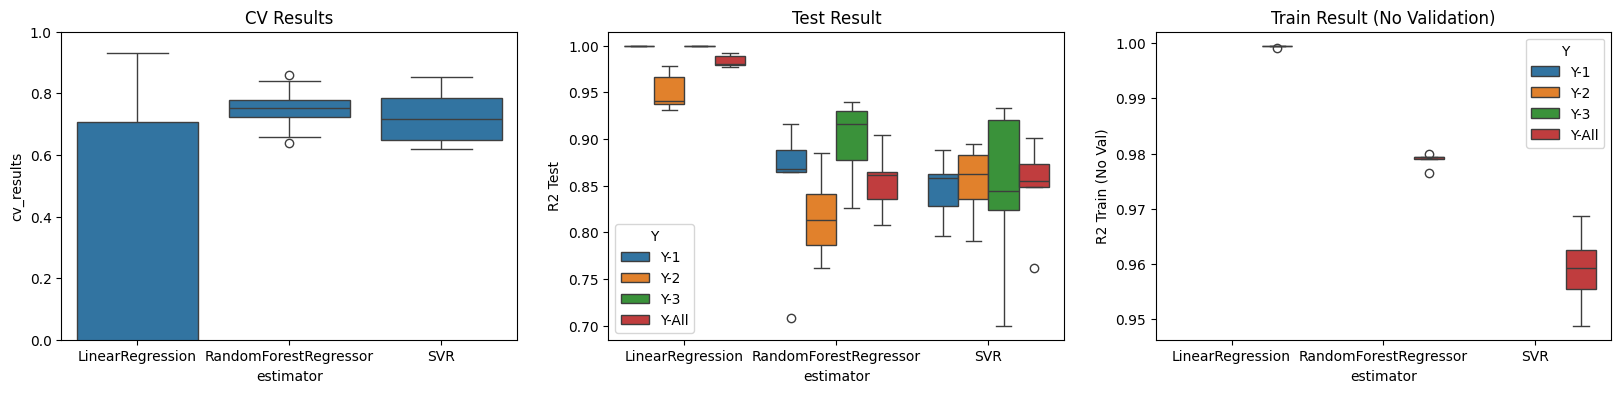

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Plot CV results
sns.boxplot(cv_data, x="estimator", y="cv_results", ax=axes[0])
axes[0].set_ylim([0, 1])
axes[0].set_title("CV Results")

# Plot test results
ax = sns.boxplot(data=df_eval, x="estimator", y="R2 Test", hue="Y", ax=axes[1])
axes[1].set_title("Test Result")

# Plot train (no cv) results
sns.boxplot(data=df_eval, x="estimator", y="R2 Train (No Val)", hue="Y", ax=axes[2])
axes[2].set_title("Train Result (No Validation)")

if SAVE_PLOT:
    filename = f"S05_eval_{dt}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')

### Save data

In [56]:
if SAVE_DATA:
    filename = f"S05_data_{dt}.pkl"

    data_save = {
        "desc": "This is the saved data",
        "filenameInput": filename,
        "df_eval": df_eval,
        "cv_data": cv_data
    }

    # Save the model
    MyUtil.save_data(filename=filename, data=data_save)

### Test loading data


In [57]:
if SAVE_DATA:
    data_load = MyUtil.load_data(filename=filename)

    pp(list(data_load.keys()))

['desc', 'filenameInput', 'df_eval', 'cv_data']
